In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
homicidios=pd.read_csv('Datasets/Homicidios_clean.csv')

In [3]:
#Importamos la data de poblacion por comuna
poblacion = pd.read_excel('Datasets/Censo_nacional_2022.xlsx')
poblacion


,"Censo Nacional de Población, Hogares y Viviendas 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Cuadro resumen. Total de población, población ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jurisdicción,Total,NaN,NaN,NaN,Varones,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN
2,NaN,Total de población,Población en viviendas particulares,Población en viviendas colectivas (¹),Población en situación de calle(²),Total de población,Población en viviendas particulares,Población en viviendas colectivas (¹),Población en situación de calle(²),Total de población,Población en viviendas particulares,Población en viviendas colectivas (¹),Población en situación de calle(²)
3,Total del país,45892285,45618787,267793,5705,22186791,22010881,171436,4474,23705494,23607906,96357,1231
4,Ciudad Autónoma de Buenos Aires,3121707,3095454,23850,2403,1439873,1428781,9216,1876,1681834,1666673,14634,527
5,Buenos Aires,17523996,17408906,113664,1426,8470569,8393419,76030,1120,9053427,9015487,37634,306


In [4]:
poblacion_total = poblacion['Unnamed: 1'][4]
poblacion_total = pd.to_numeric(poblacion_total, errors='coerce')
print(f"Población Total de CABA segun el Censo 2022: {poblacion_total}")

Población Total de CABA segun el Censo 2022: 3121707


1) KPIs Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.   

**Tasa de Homicidios=( Numero de homicidios en siniestros viales / Poblacion total )×100,000**  

In [13]:
#Transformamos a datetime para su mejor manejo
homicidios['FECHA_FALLECIMIENTO'] = pd.to_datetime(homicidios['FECHA_FALLECIMIENTO'], errors='coerce')

In [5]:
#Se filtran los datos por fecha de fallecimiento no nula
fecha_fallecimiento = homicidios.loc[homicidios['FECHA_FALLECIMIENTO'].notnull()]
#Calculamos la tasa de homicidios
homicidios_counts = (fecha_fallecimiento['N_VICTIMAS'].sum() / poblacion_total) * 100000
#Calculamos la tasa de homicidios del último semestre
homicidios_ultimo_sem = homicidios_counts
#Calculamos la reducción
reduccion = homicidios_ultimo_sem* 0.9
#Creamos un diccionario con los resultados
resultados = {
    "Tasa de Homicidios Último Semestre": [homicidios_ultimo_sem],
    "Objetivo de Reducción (10%)": [reduccion],
}

#Se convierte el diccionario a un DataFrame
df_resultados = pd.DataFrame(resultados)

df_resultados


,Tasa de Homicidios Último Semestre,Objetivo de Reducción (10%)
0,22.071258,19.864132


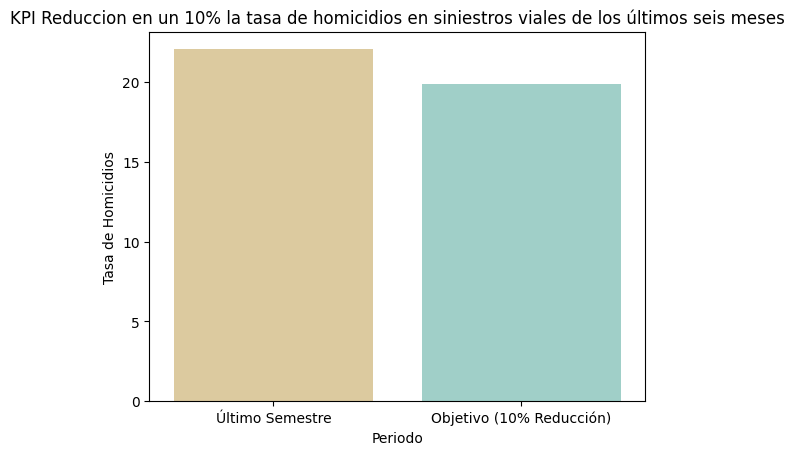

In [6]:
#Crear el DataFrame
kpi= pd.DataFrame({
    'Periodo': ['Último Semestre', 'Objetivo (10% Reducción)'],
    'Tasa de Homicidios': [homicidios_ultimo_sem, reduccion]
})

#Generamos el gráfico de barras
sns.barplot(x='Periodo', y='Tasa de Homicidios', data=kpi, palette='BrBG',
            hue='Periodo', label='Tasa de Homicidios por 100,000 habitantes')

#Agregamos título
plt.title('KPI Reduccion en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses')

#Mostramos el gráfico
plt.show()

2) KPI Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.  

**(Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100**

In [9]:
#Convertimos la columna 'FECHA' en formato de fecha y hora
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'], errors='coerce')
#Se filtran los datos para seleccionar solo los accidentes que involucran a motociclistas
accidentes_moto_por_anio = homicidios[homicidios['VICTIMA'] == 'MOTO']
#Agrupamos los datos por año y contar la cantidad de accidentes en cada año
accidentes_moto_por_anio = accidentes_moto_por_anio.groupby(accidentes_moto_por_anio['FECHA'].dt.year).size().reset_index(name='Cantidad')
#Calculamos el porcentaje de cambio en la cantidad de accidentes entre años consecutivos
accidentes_moto_por_anio.columns = ['Año', 'Cantidad']
accidentes_moto_por_anio['Porcentaje_Cambio'] = (
    (accidentes_moto_por_anio['Cantidad'].shift(1) - accidentes_moto_por_anio['Cantidad']) / 
    accidentes_moto_por_anio['Cantidad'].shift(1)
) * 100
print(accidentes_moto_por_anio)

#Obtenemos el porcentaje de cambio del último año
porcentaje_reduccion_ultimo_anio = accidentes_moto_por_anio['Porcentaje_Cambio'].iloc[-1]



    Año  Cantidad  Porcentaje_Cambio
0  2016        65                NaN
1  2017        56          13.846154
2  2018        57          -1.785714
3  2019        50          12.280702
4  2020        28          44.000000
5  2021        46         -64.285714


In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=accidentes_moto_por_anio['Año'], y=accidentes_moto_por_anio['Cantidad'], mode='lines+markers', name='Cantidad de Accidentes'))
fig.add_trace(go.Scatter(x=accidentes_moto_por_anio['Año'], y=accidentes_moto_por_anio['Porcentaje_Cambio'], mode='lines+markers', name='Porcentaje de Cambio'))

fig.update_layout(title='KPI: Reducción de Accidentes Mortales de Motociclistas',
                  xaxis_title='Año',
                  yaxis_title='Cantidad / Porcentaje de Cambio',
                  legend=dict(x=0, y=1),
                  template='plotly_dark')
fig.show()

3) KPI Reducir en un 10% la cantidad de accidentes mortales em la comuna 1 en el último año, en CABA, respecto al año anterior.  

**(Número de accidentes mortales en la comuna 1 en el año anterior - Número de accidentes mortales en la comuna 1 en el año actual) / (Número de accidentes mortales en la comuna 1 en el año anterior) * 100**



In [11]:
#Selecciona los datos de la comuna 1
accidentes_com1 = homicidios[homicidios['COMUNA'] == 1]
#Selecciona el año actual
año_actual = accidentes_com1['AÑO'].max()
#Selecciona el año anterior
año_anterior = año_actual - 1
#Selecciona los años 2021 y 2020
año_2021 = año_actual
año_2020 = año_actual - 1
#Filtra por los cuatro años
accidentes_com1 = accidentes_com1[(accidentes_com1['AÑO'] == año_anterior) | 
                                  (accidentes_com1['AÑO'] == año_actual) |
                                  (accidentes_com1['AÑO'] == año_2020) |
                                  (accidentes_com1['AÑO'] == año_2021)]
#Agrupamos por fecha y contar la cantidad de accidentes
accidentes_com1 = accidentes_com1.groupby(accidentes_com1['AÑO']).size().reset_index(name='Cantidad')
#Se calcula el porcentaje de cambio en la cantidad de accidentes
accidentes_com1['Porcentaje_Cambio'] = ((accidentes_com1['Cantidad'].shift(1) - accidentes_com1['Cantidad']) / 
                                             accidentes_com1['Cantidad'].shift(1)) * 100
#Accedemos a la cantidad de accidentes del año anterior
cantidad_anterior = accidentes_com1[accidentes_com1['AÑO'] == año_anterior]['Cantidad'].iloc[0]
#Accedemos a la cantidad de accidentes del año actual
cantidad_actual = accidentes_com1[accidentes_com1['AÑO'] == año_actual]['Cantidad'].iloc[0]
#Accedemos al porcentaje de cambio
porcentaje_reduccion = accidentes_com1[accidentes_com1['AÑO'] == año_actual]['Porcentaje_Cambio'].iloc[0]
#Imprimimos los resultados
if porcentaje_reduccion <= 10:
    print("¡Se ha logrado una reducción del 10% o más en la cantidad de accidentes mortales en la comuna 1 en el último año!")
else:
    print("La reducción en la cantidad de accidentes mortales en la comuna 1 no alcanzó el 10%.")
print(f"Año actual: {año_actual}")
print(f"Cantidad de accidentes en el año anterior: {cantidad_anterior}")
print(f"Cantidad de accidentes en el año actual: {cantidad_actual}")
print(f"Porcentaje de reducción: {porcentaje_reduccion:.2f} %")

¡Se ha logrado una reducción del 10% o más en la cantidad de accidentes mortales en la comuna 1 en el último año!
Año actual: 2021
Cantidad de accidentes en el año anterior: 10
Cantidad de accidentes en el año actual: 9
Porcentaje de reducción: 10.00 %
